<a href="https://colab.research.google.com/github/marjorieariele/Projetos-IA/blob/main/Classifica%C3%A7%C3%A3o_pacientes_Inteligencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Informar o arquivo usado
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar a biblioteca pandas para acessar o banco de dados
import pandas as pd

In [ ]:
# Mostrar o conjunto de dados
df = pd.read_csv('/content/drive/MyDrive/IA/Gustavo Classificacao/Exer-1.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#tenho dados nulos?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#tenho duplicadas?
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
#excluindo as duplicadas
df = df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Renomear pro meu entendimento
substituir_nomes = {'age': 'Idade', 'sex': 'Sexo', 'cp': 'Tipo de dor', 'trestbps': 'Pressão',
               'chol': 'Colesterol', 'fbs': 'Glicemia', 'restecg': 'Eletro', 'thalach': 'BPM',
               'exang': 'Dor por exec.'}

df = df.rename(columns=substituir_nomes)
df

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
Sexo,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
Tipo de dor,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
Pressão,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
Colesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
Glicemia,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
Eletro,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
BPM,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
Dor por exec.,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [ ]:
#Pressao e colesterol- valores estranhos
# Excluir as linhas que possuem o valor de colesterol igual a 200
df = df[df['Colesterol'] != 564.0]

# Excluir as linhas que possuem o valor de pressão arterial igual a 564
df = df[df['Pressão'] != 200.0]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,300.0,54.373333,9.048400,29.0,47.75,55.0,61.0,77.0
Sexo,300.0,0.686667,0.464624,0.0,0.00,1.0,1.0,1.0
Tipo de dor,300.0,0.963333,1.032250,0.0,0.00,1.0,2.0,3.0
Pressão,300.0,131.430000,17.144627,94.0,120.00,130.0,140.0,192.0
Colesterol,300.0,245.303333,48.497402,126.0,211.00,240.0,274.0,417.0
Glicemia,300.0,0.146667,0.354364,0.0,0.00,0.0,0.0,1.0
Eletro,300.0,0.530000,0.526012,0.0,0.00,1.0,1.0,2.0
BPM,300.0,149.590000,22.952078,71.0,133.75,152.5,166.0,202.0
Dor por exec.,300.0,0.326667,0.469778,0.0,0.00,0.0,1.0,1.0
oldpeak,300.0,1.031333,1.152205,0.0,0.00,0.8,1.6,6.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          300 non-null    int64  
 1   Sexo           300 non-null    int64  
 2   Tipo de dor    300 non-null    int64  
 3   Pressão        300 non-null    int64  
 4   Colesterol     300 non-null    int64  
 5   Glicemia       300 non-null    int64  
 6   Eletro         300 non-null    int64  
 7   BPM            300 non-null    int64  
 8   Dor por exec.  300 non-null    int64  
 9   oldpeak        300 non-null    float64
 10  slope          300 non-null    int64  
 11  ca             300 non-null    int64  
 12  thal           300 non-null    int64  
 13  target         300 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.2 KB


array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'Sexo'}>,
        <Axes: title={'center': 'Tipo de dor'}>,
        <Axes: title={'center': 'Pressão'}>],
       [<Axes: title={'center': 'Colesterol'}>,
        <Axes: title={'center': 'Glicemia'}>,
        <Axes: title={'center': 'Eletro'}>,
        <Axes: title={'center': 'BPM'}>],
       [<Axes: title={'center': 'Dor por exec.'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

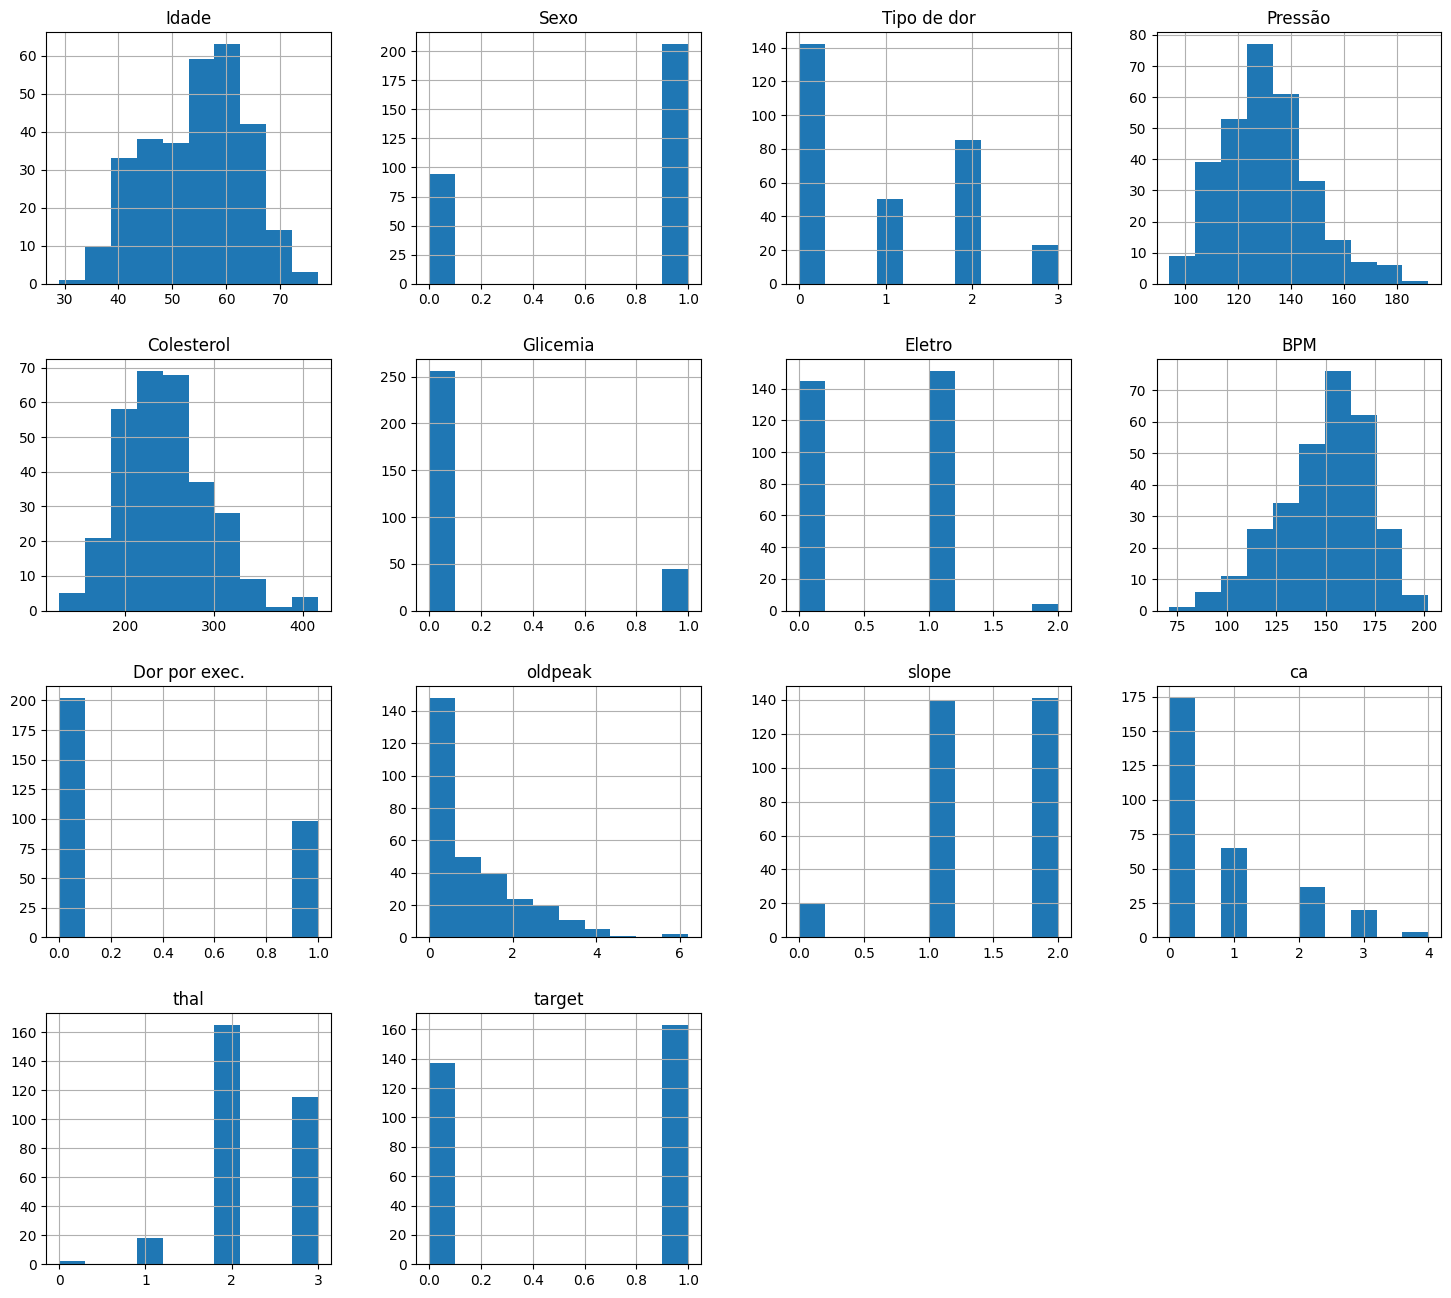

In [ ]:
#histograma das variáveis numéricas
df.hist(figsize=(18,16))

In [ ]:
#quantidade e a taxa de pacientes doentes e saudáveis

labels = ['Saudaveis', "doentes"] #define dados do gráfico

contagem = pd.cut(x=df.target, bins=2,labels= labels, include_lowest=True).value_counts() #nº de doentes

taxa_de_doentes = (pd.value_counts(pd.cut(x=df.target, bins=2,labels= labels,
                                                include_lowest=True),normalize=True) * 100).round(1) #taxa de doentes
quant_saudaveis = pd.DataFrame({"Contagem":contagem,
                              'Taxa de saudaveis(%)':taxa_de_doentes}) #criando um DataFrame para facilitar a visualização dos dados

quant_saudaveis

,Contagem,Taxa de saudaveis(%)
doentes,163,54.3
Saudaveis,137,45.7


In [ ]:
#Quantidade de pessoas por sexo
quant_sex = pd.DataFrame(df['Sexo'].value_counts())
quant_sex['Sexo em %'] = (quant_sex['Sexo'] / quant_sex['Sexo'].sum() * 100).round(2)
quant_sex['Nº Doentes por Sexo'] = df.groupby('Sexo')['target'].sum()
quant_sex['Taxa de Doentes por Sexo em %'] = (quant_sex['Nº Doentes por Sexo'] / quant_sex['Sexo'] * 100).round(2)

quant_sex


,Sexo,Sexo em %,Nº Doentes por Sexo,Taxa de Doentes por Sexo em %
1,206,68.67,92,44.66
0,94,31.33,71,75.53


In [ ]:
df.corr()

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,oldpeak,slope,ca,thal,target
Idade,1.000000,-0.088229,-0.067638,0.294083,0.191528,0.121592,-0.107061,-0.398705,0.096315,0.205274,-0.161815,0.306901,0.059912,-0.226575
Sexo,-0.088229,1.000000,-0.051928,-0.044748,-0.174324,0.056606,-0.070886,-0.048153,0.148732,0.115235,-0.048022,0.117047,0.224940,-0.287478
Tipo de dor,-0.067638,-0.051928,1.000000,0.063635,-0.097383,0.106182,0.042070,0.290866,-0.389029,-0.142442,0.113383,-0.190295,-0.161816,0.428426
Pressão,0.294083,-0.044748,0.063635,1.000000,0.147383,0.151429,-0.108798,-0.038307,0.049356,0.169518,-0.099049,0.083057,0.053510,-0.133356
Colesterol,0.191528,-0.174324,-0.097383,0.147383,1.000000,0.014528,-0.133625,-0.013553,0.080045,0.036058,0.021423,0.105292,0.076201,-0.104413
Glicemia,0.121592,0.056606,0.106182,0.151429,0.014528,1.000000,-0.077512,-0.000806,0.012590,-0.015389,-0.042319,0.135650,-0.040680,-0.017150
Eletro,-0.107061,-0.070886,0.042070,-0.108798,-0.133625,-0.077512,1.000000,0.040498,-0.066860,-0.046806,0.081687,-0.081804,-0.003010,0.135204
BPM,-0.398705,-0.048153,0.290866,-0.038307,-0.013553,-0.000806,0.040498,1.000000,-0.374952,-0.341049,0.384316,-0.225242,-0.094417,0.417866
Dor por exec.,0.096315,0.148732,-0.389029,0.049356,0.080045,0.012590,-0.066860,-0.374952,1.000000,0.280082,-0.250184,0.118592,0.204804,-0.431575
oldpeak,0.205274,0.115235,-0.142442,0.169518,0.036058,-0.015389,-0.046806,-0.341049,0.280082,1.000000,-0.567636,0.230314,0.200872,-0.427634


In [ ]:
#excluir a ultima coluna
y = df ['target']
x= df.drop('target', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Agora teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classificador = Sequential()

#13 entradas
classificador.add(Dense(units = 32, activation = 'relu',
                        kernel_initializer = 'random_uniform', input_dim = 13))
#classificador.add(Dense(units = 128, activation = 'relu',
  #                     kernel_initializer = 'random_uniform'))
#classificador.add(Dense(units = 256, activation = 'relu',
#                       kernel_initializer = 'random_uniform'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

#otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
#classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
#                      metrics = ['binary_accuracy'])

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
classificador.fit(x_train, y_train,
                  batch_size = 10, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 0.8158 - binary_accuracy: 0.5778
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8452 - binary_accuracy: 0.5244
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6753 - binary_accuracy: 0.6089
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5775 - binary_accuracy: 0.6800
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5618 - binary_accuracy: 0.6978
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5673 - binary_accuracy: 0.6578
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5148 - binary_accuracy: 0.7511
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4978 - binary_accuracy: 0.7600
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5228 - binary_accuracy: 0.7689
Epoch 10/100
23/23 [==========================

In [ ]:
pesos0 = classificador.layers[0].get_weights()
print(pesos0)
print(len(pesos0))
pesos1 = classificador.layers[1].get_weights()


[array([[-8.09731334e-03,  9.26730875e-03,  4.51523736e-02,
         1.27717741e-02,  4.38273214e-02, -1.53310075e-02,
        -1.28861712e-02, -3.49187627e-02, -2.06830036e-02,
        -6.24395953e-03, -3.24116461e-02,  9.60319303e-03,
        -4.16689403e-02,  3.96399312e-02, -3.42355147e-02,
         1.51359327e-02, -1.93253867e-02, -8.38228874e-03,
         3.38272043e-02, -4.98357927e-03, -2.23101862e-02,
         3.31096351e-02, -4.38965671e-02, -9.22907051e-03,
        -3.04731857e-02, -3.33105326e-02, -4.02141325e-02,
         1.52771901e-02, -4.30540703e-02,  1.45044168e-02,
        -5.81115438e-03,  2.12107459e-03],
       [ 1.15967989e-02,  8.62379745e-03, -4.27775830e-01,
         4.39612508e-01, -2.86136270e-02, -4.26730335e-01,
         4.07372057e-01,  3.78788449e-02, -1.44439936e-03,
         3.68002623e-01, -3.62417586e-02,  4.26353782e-01,
         3.70595194e-02, -5.75243235e-02, -4.32353616e-02,
        -9.89796966e-03,  3.45338047e-01, -4.18026417e-01,
        -5.7

In [ ]:
previsoes = classificador.predict(x_test)
previsoes = (previsoes > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
acuracia = accuracy_score(y_test, previsoes)
precisao = precision_score(y_test, previsoes)
recall = recall_score(y_test, previsoes)
f1score = f1_score(y_test, previsoes)
matriz = confusion_matrix(y_test, previsoes)


3/3 [==============================] - 0s 4ms/step


In [ ]:
print('Acurácia: %f' % acuracia)
print('Precision: %f' % precisao)
print('Recall: %f' % recall)
print('F1-Score: %f' % f1score)
print(matriz)

Acurácia: 0.866667
Precision: 0.837209
Recall: 0.923077
F1-Score: 0.878049
[[29  7]
 [ 3 36]]


In [ ]:
#tentativa de melhorar a acuracia

In [ ]:
#Transformar em texto
classificador_json = classificador.to_json()
with open('classificador_breast.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_breast.h5')

In [ ]:
#separar os previsores da classe
#Extrair a coluna target do data set de treino e excluí-la do treino
previsores = df.iloc[:, 0:13].values
classe = df.iloc[:, 13].values

In [ ]:
print(previsores)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [ ]:
print(classe)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
# separando, preparando os daos para treinamento e teste, sendo 25% para teste e 75% para treino
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

In [ ]:
print(classe_teste)

[0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0
 1]


In [ ]:
df.describe()

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.373333,0.686667,0.963333,131.430000,245.303333,0.146667,0.530000,149.590000,0.326667,1.031333,1.403333,0.716667,2.310000,0.543333
std,9.048400,0.464624,1.032250,17.144627,48.497402,0.354364,0.526012,22.952078,0.469778,1.152205,0.612568,1.006528,0.612495,0.498951
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#utilizando Redes Neurais: Função de ativação relu
import keras
from keras.models import Sequential
from keras.layers import Dense
classificador = Sequential()
classificador.add(Dense(units = 50, activation = 'relu',
                        kernel_initializer = 'random_uniform', input_dim = 13))

classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 1, epochs = 100)

Epoch 1/100
225/225 [==============================] - 2s 4ms/step - loss: 1.1414 - binary_accuracy: 0.5822
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.7028 - binary_accuracy: 0.6889
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6384 - binary_accuracy: 0.6978
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.7105 - binary_accuracy: 0.6756
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6102 - binary_accuracy: 0.7556
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5690 - binary_accuracy: 0.7378
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5751 - binary_accuracy: 0.7244
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4973 - binary_accuracy: 0.7644
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5131 - binary_accuracy: 0.7422
Epoch 10/100
225/225 [======

In [ ]:
#verificando os pesos
pesos0 = classificador.layers[0].get_weights()
print(pesos0)
print(len(pesos0))
pesos1 = classificador.layers[1].get_weights()
#pesos2 = classificador.layers[2].get_weights()

[array([[-5.34517765e-02, -2.80708317e-02, -6.44762116e-03,
        -3.97005072e-03, -2.67651137e-02, -3.93728390e-02,
         1.72183253e-02, -4.55480926e-02, -1.56511609e-02,
        -5.12113310e-02,  2.63772476e-02, -3.00417878e-02,
        -2.48989817e-02, -1.84771698e-02,  1.57314260e-02,
        -2.68463735e-02, -2.36760508e-02,  1.36225484e-02,
         3.47804278e-02, -3.46117094e-03,  1.21465959e-02,
        -1.72868930e-03, -1.06101111e-03, -3.27613726e-02,
         1.03220716e-02, -2.85107139e-02, -6.66369647e-02,
        -1.54183609e-02, -2.91965250e-02,  3.05490606e-02,
         1.82722509e-02, -5.22487760e-02, -3.53724174e-02,
         2.29947455e-02, -3.54489381e-03,  2.15768255e-02,
        -3.44673432e-02, -1.48700951e-02, -3.60691249e-02,
         3.65070663e-02,  8.49625003e-03, -2.78328080e-02,
         4.13910300e-03, -7.44134933e-02, -1.75277852e-02,
        -3.55203971e-02, -2.43703439e-03,  1.36891194e-02,
         1.39004467e-02,  1.51101789e-02],
       [-1.2

In [ ]:
previsoes = classificador.predict(previsores_teste)

3/3 [==============================] - 0s 3ms/step


In [ ]:
#Valores de acurácia, matriz de confusã, socore, recall e f1score
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
acuracia = accuracy_score(classe_teste, previsoes)
precisao = precision_score(classe_teste, previsoes)
recall = recall_score(classe_teste, previsoes)
f1score = f1_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

3/3 [==============================] - 0s 3ms/step


In [ ]:
#mostrando os valores
print('Acurácia: %f' % acuracia)
print('Precision: %f' % precisao)
print('Recall: %f' % recall)
print('F1-Score: %f' % f1score)
print(matriz)

Acurácia: 0.880000
Precision: 0.840909
Recall: 0.948718
F1-Score: 0.891566
[[29  7]
 [ 2 37]]


In [ ]:
#Transformar em texto
classificador_json = classificador.to_json()
with open('classificador_breast.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_breast.h5')
